<a href="https://colab.research.google.com/github/poojasaxena/tensorflow-developer-zertificate-coursera/blob/main/course2_convolutional-neural-networks-tensorflow/03_transfer-learning/Course_2_Part_6_Lesson_4_Notebook_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1. introducing EfficientNet 

In [1]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

In [ ]:
?EfficientNetB0

## Transfer Learning

1. 'include_top=False', This option excludes the final Dense layer that turns 1280 features on the penultimate layer into prediction of the 1000 ImageNet classes. 
2. Replacing the top layer with custom layers allows using EfficientNet as a feature extractor in a transfer learning workflow.

In [2]:
'''When the model is intended for transfer learning, the Keras 
implementation provides a option to remove the top layers: '''
model = EfficientNetB0(include_top=False, weights='imagenet')

## Regularization
 
1. 'drop_connect_rate' which controls the dropout rate responsible for stochastic depth. 
2. This parameter serves as a toggle for extra regularization in finetuning, but does not affect loaded weights. For example, when stronger regularization is desired, try:

`` model = EfficientNetB0(weights='imagenet', drop_connect_rate=0.4) ``


In [3]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


#  Step 2. Dataset

1. Here we load data from tensorflow_datasets (hereafter TFDS). Stanford Dogs dataset is provided in TFDS as stanford_dogs. 
2. It features 20,580 images that belong to 120 classes of dog breeds (12,000 for training and 8,580 for testing).

In [ ]:
#!pip install tensorflow_datasets

In [8]:
import tensorflow_datasets as tfds

ModuleNotFoundError: No module named '_bz2'

In [40]:
 ## The main library entrypoints are:

#tfds.builder: fetch a tfds.core.DatasetBuilder by name
#tfds.load: convenience method to construct a builder, download the data, and create an input pipeline, returning a tf.data.Dataset.

In [ ]:
(img_train, label_train), (img_test, label_test) = keras.datasets.

In [5]:
from tensorflow import keras

In [6]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [8]:
batch_size = 64
dataset_name ='stanford_dogs'

(ds_train, ds_test), ds_info = tfds.load(dataset_name, split=['train', 'test'], with_info=True, as_supervised=True)
NUM_CLASSES = ds_info.features["label"].num_classes
print("NUM_CLASSES for this dataset:", NUM_CLASSES)

In [35]:
ds_info.description

'The Stanford Dogs dataset contains images of 120 breeds of dogs from around\nthe world. This dataset has been built using images and annotation from\nImageNet for the task of fine-grained image categorization. There are\n20,580 images, out of which 12,000 are used for training and 8580 for\ntesting. Class labels and bounding box annotations are provided\nfor all the 12,000 images.'

In [38]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
    'objects': Sequence({
        'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
    }),
})

In [28]:
## IMG_SIZE is determined by EfficientNet model choice
IMG_SIZE = 224

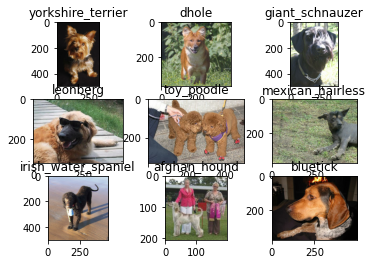

In [41]:
## Visualizing the data
import matplotlib.pyplot as plt

def format_label(label):
    string_label = label_info.int2str(label)
    return string_label.split("-")[1]

label_info = ds_info.features["label"]

for i, (image, label) in enumerate(ds_train.take(9)):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(image.numpy().astype("uint8"))
  plt.title("{}".format(format_label(label)))
  plt.axis()